# Task 1: Develop Learning-Based Model(s) for Classification

## Subtask 1.a. Methods

Below, we describe how Naïve Bayes Classifier (BN), K-Nearest  Neighbour  (KNN),  Ensemble  Learning  (EL),  and  Support  Vector  Machines 
(SVM) classification methods work.

- `BN` &ndash; this is a classification algorithm based on Bayes' Theorem. It implies that each feature in a class is independent from the other features present. BN models are useful when dealing with large datasets and are also simple and easy to build. They are even capable of outperforming more complex classification algorithms on some tasks.

- `KNN` &ndash; this is another simple algorithm that functions by storing the entire dataset. When predicting values, the k most relevant data values are detected. Then, a final decision about the prediction is made based on these  located 'neighbor' data points. Mainly, we take the most common output or the average value, hence, the `KNN` algorithm is suitable for both classification and regression tasks.


- `EL` &ndash; the `EL` algorithms employ multiple machine learning models (i.e. classifiers such as decision trees) to solve a specific task. `EL` is described as combining several individual classifiers/regressors to achieve a greater stability, prediction accuracy and generalisation.

- `SVM` &ndash; this algorithm isolates data points utilising the hyperplane (higher dimensional space) with the greatest margin. `SVM` identifies an ideal hyperplane and this supports the classification of new data. This method can be employed in both classification and regression tasks and it can easily deal with continuous and categorical variables. `SVM` offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. 

## Subtask 1.b. Data  Preparation  and  Import

Here, we provide a short description of data about the number of data samples in the training set and testing set, We also show how to import the data into our programming environment.

To accomplish the above tasks, we first need to mount our Google Drive and unzip the dataset (accessible in MyAberdeen) and extract the contents to our `data` folder.

**Please replace the location argument of the `!unzip` command in the code below with the destination path of the dataset ZIP file in your Google Drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Below is the location of the dataset ZIP file on my Google Drive. This will differ in your case, so please adjust as needed.

In [ ]:
!unzip -q '/content/drive/MyDrive/Colab Notebooks/Assessment_2/CS5062_AssessmentII_Dataset.zip' -d './data/'

### Importing the Data

We adopt the `pandas` Python package to read the train and test comma-separated values (csv) dataset files into 2 `DataFrame` structures. Specifically, we use the `read_csv` functions of the package to carry out the task.

In [1]:
# Import the crucial Pandas and Matplotlib packages
# used for data preparation and visualisation respectively
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 'Read' the train and test data into Pandas data frames
train_df, test_df = pd.read_csv('data/Train.csv'), pd.read_csv('data/Test.csv')

#### Describing the Data

We employ the `DataFrame.describe()` method of the `pandas` library to display some basic statistical details like percentile, mean, std etc. of our data frame. We also show the shapes of the train and test datasets.

In [2]:
# Print the training dataset shape and describe the set
print(f'Training data shape: {train_df.shape}\n')
train_df.describe()

Training data shape: (107085, 3)



,Trip,VehicleSpeed_km_h_,Battery_Status
count,107085.000000,107085.000000,107085.000000
mean,2398.752832,34.640675,0.264388
std,509.159153,22.455519,0.441009
min,1567.000000,0.000000,0.000000
25%,1949.000000,15.589999,0.000000
50%,2384.000000,36.270000,0.000000
75%,2902.000000,52.529999,1.000000
max,3263.000000,103.430000,1.000000


In [3]:
# Print the test dataset shape and describe the set
print(f'Test data shape: {test_df.shape}\n')
test_df.describe()

Test data shape: (60172, 3)



,Trip,VehicleSpeed_km_h_,Battery_Status
count,60172.000000,60172.000000,60172.000000
mean,2449.359320,34.255137,0.257346
std,447.700622,22.876331,0.437175
min,1558.000000,0.000000,0.000000
25%,2105.000000,13.960000,0.000000
50%,2533.000000,36.369999,0.000000
75%,2806.000000,53.590000,1.000000
max,3271.000000,84.650002,1.000000


We notice that the dataset consists only of numeric values. There are 107,058 records of train and 60,172 records of test data, each with 2 features &mdash; `Trip` and `VehicleSpeed_km_h_` &mdash; and a target variable `Battery_Status`. Moreover, it is worth noting that the feature value ranges are different (quantities in the 10s and 1000s thus not scaled) for each feature. Hence, we will need to perform some data scaling on the provided data which is detailed in the sections below. The maximum, minimum, mean values etc. are all observable in the data frame shown above.

### Preparing the Data

In the task requirements it is specifically stated that:

- **"For the sake of reducing time for training and running a model, only speed is used to predict the battery status."**

Therefore, we need to reduce the dimensionality of the train and test data to 1 feature (`VehicleSpeed_km_h_` column) by removing the 'Trip' feature since we only care about how EV speed affects its battery status. We perform this by using the `drop()` function of the `pandas.DataFrame` package as shown in the code below:

In [4]:
# Drop the 'Trip' column from both training and test data frames
train_df_reduced = train_df.drop(["Trip"], axis=1)
test_df_reduced = test_df.drop(["Trip"], axis=1)


#### Handling Missing Values

First, we need to check if there are any missing (`NaN`) values our dataset. This can be evaluated via the `isnull()` or `isna()` functions of the `pandas.DataFrame` structure as shown below.


In [ ]:
# Check for null values
train_df_reduced.isnull().values.any(),  test_df_reduced.isnull().values.any()

(False, False)

Apparently, there are no missing values in our train and test sets. This is a good thing because e if a dataset is full of `NaN` (junk) values, then the trained model will surely show a poor performance. So taking care of such missing values is indeed an important preprocessing step which is not required in our scenario.

#### Visualisation

Next, we plot some figures to visualise our data.

First of all, let us see some data histograms for both the training and test datasets. This will show us the actual data distributions over the `VehicleSpeed_km_h_` feature and the `Battery_Status` target variable.

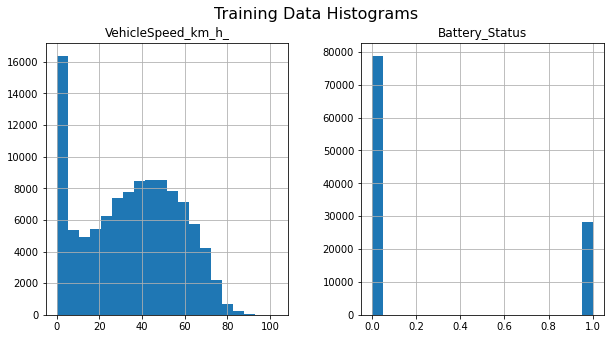

In [14]:
# Plot training data histograms
train_df_reduced.hist(bins=20, figsize=(10,5))
plt.suptitle("Training Data Histograms", fontsize=16)
plt.show()

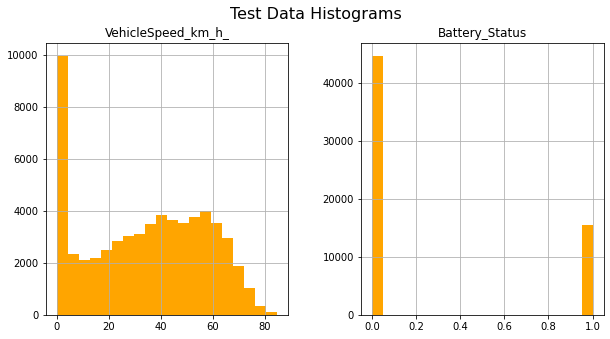

In [26]:
# Plot test data histograms
test_df_reduced.hist(bins=20, figsize=(10,5), color='orange')
plt.suptitle("Test Data Histograms", fontsize=16)
plt.show()

The above figures depict that the majority of the `Battery_Status` target variable values are 0 while the rest are 1's. Moreover, the input feature `VehicleSpeed_km_h` comprise values that mostly follow a normal (Gaussian) distribution. Therefore, a suitable scaling method in our case would be standardisation.

In [27]:
# Print the 0's to 1's ratio of the training data
all_zeroes_train = train_df[train_df['Battery_Status']==0]['Battery_Status'].count()
all_ones_train = train_df[train_df['Battery_Status']==1]['Battery_Status'].count()
print(f'Train data zeroes:ones ratio: {(all_zeroes_train/all_ones_train)}\n')

# Print the 0's to 1's ratio of the test data
all_zeroes_test = test_df[test_df['Battery_Status']==0]['Battery_Status'].count()
all_ones_test = test_df[test_df['Battery_Status']==1]['Battery_Status'].count()
print(f'Test data zeroes:ones ratio: {(all_zeroes_test/all_ones_test)}')

Train data zeroes:ones ratio: 2.7823184515399833

Test data zeroes:ones ratio: 2.885824991927672


Particularly, we have $\approx 2.7823$ and $\approx 2.8858$ or almost 3 times more 0's than 1's in the train and test sets.

#### Data Types

In [ ]:
# Print the both dataset data types of each feature
# together with the memory usage of the data
print('Train Data\n')
train_df_reduced.info()
print('\n' + '-'*50 + '\nTest Data\n')
test_df_reduced.info()

Train Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107085 entries, 0 to 107084
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   VehicleSpeed_km_h_  107085 non-null  float64
 1   Battery_Status      107085 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 MB

--------------------------------------------------
Test Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60172 entries, 0 to 60171
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   VehicleSpeed_km_h_  60172 non-null  float64
 1   Battery_Status      60172 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 940.3 KB


Above we can see that the train and test datasets contain 2 diferent data types `int64` and `float64`. Using 64-bit data consumes great deal of memory and in our case the usage of such data type is inefficient since we are not looking for such a high level of result precision. Hence, we can convert the data type of the data frames to to 32-bit (using `int32` and `float32`) to save some memory and boost the algorithm speed.

In [ ]:
# Convert both dataset values to 32-bit to save memory usage and boost runtime
train_df_32 = train_df_reduced.astype({"VehicleSpeed_km_h_": 'float32', \
                               "Battery_Status": 'int32'})
test_df_32 = test_df_reduced.astype({"VehicleSpeed_km_h_": 'float32', \
                             "Battery_Status": 'int32'})

#### Separating Features and Labels (Targets)

For this we are going to make use of the `DataFrame.iloc[rows, columns]` method offered by the pandas library. 

In [ ]:
# Divide the single feature from the target variable
X_train, y_train = train_df_32.iloc[:,:-1], train_df_32.iloc[:,-1]
X_test, y_test = test_df_32.iloc[:,:-1], test_df_32.iloc[:,-1]

#### Feature Scaling

We employ standardisation for feature scaling since is not bounded to a certain range making it more robust to outliers. Thus, it is often prefered over the min-max normalisation. 

Also, this technique centers the data around the mean (becomes 0 of the new distribution) with a standard deviation of 1. It is useful for the optimization algorithms, such as gradient descent, that are used within machine-learning algorithms that weight inputs (e.g., regression and neural networks). Rescaling is also used for algorithms that use distance measurements, for example, K-nearest-neighbours (KNN).

In [ ]:
# Import the StandardScaler class
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance used in standardising our data
sc = StandardScaler()

# Fit only to the train data to avoid data leakage from the test set.
# Then we transform both the train and test sets.
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Subtasks 1.c., 1.d., 2. and 3.a. Model Implementation and Details

**Note that in this section we also include the information required to complete Subtask 3.a. After displaying the result we obtain when a code snippet is run (i.e. model F1 score, data frame, figure with results) we provide a brief analysis of the received output. Hence, we combined Subtasks the above-mentioned tasks into this one Subtask.**

We pick the following 2 models for implementation:

- **K-Nearest Neighbors** (**KNN**) &ndash; `KNNs` show better performance when there is a small number of features, as it is in our case (1 feature). The algorithm is known as simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data as in our case.


- **Random Forests** (**RF**) &ndash; an `EL` method that utilises multiple Decision Tree algorithms on subsets of the data and average the results. We adopt the `sklearn.ensemble.RandomForestClassifier` class for the implementation.


Both models will be used to perform binary classification where we predict one of two given classes. The binary classes are usually represented by 0's and 1's as in our case where 0 stands for low battery and 1 for high battery level of an electric vehicle.

The most basic but probably most widely adopted classification metric is accuracy.  Accuracy is well-suited for both binary and multiclass classifications. Classifiers that deal with well balanced classes (target labels) are most likely to be evaluated based on accuracy. Hence, accuracy can be a misleading metric for imbalanced data sets. In our instance, we have $\approx 3\times$ more 0's compared to 1's in our training and test data label values. Hence, we can deduce that selecting a popular metric is not always the best choice but rather the by data analysis we determine the right evaluation metric. That is, we need to look for a suitable alternative to the popular accuracy metric.

Let us now observe the **precision** and **recall** metrics. Precision (positive predictive value) is the proportion of relevant instances among the retrieved data while recall (sensitivity calculation) is the proportion of relevant instances retrieved from the search. Precision and recall are therefore based on relevance. This is visualised in Figure 1. below.

![prec_recall](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png)
<center><b>Fig 1.</b> Precision and Recall.</center>

When used independently, these aren't particularly useful metrics. For instance,if we retrieve every single item, we can have perfect recall. Likewise, if we select a tiny number of items that are extremely likely, we get near-perfect precision. In this problem instance, we want to achieve a balance between precision and recall to ensure we make good amount of relevant predictions with decent precision.

On the other hand, there is a metric that combines both precision and recall called **F1 score**. We adopt the F1 score as our model evaluation (scoring) metric because it considers both precision and recall. The F1 score is also more useful than accuracy, especially when we have an assymetric distribution of classes. It is basically the weighted average between precision and recall. As such, low precision score would lead to a decreased F1 score which also applies to the recall score. Hence, we need to find the right balance between precision and recall to maximise the F1 score. Also, F1 scores reach their highest value at 1 (100%) and their lowest value at 0 (0%) and therefore we try to maximise this score.

Furthermore, as a clarification, we take the average (macro) F1 score since we have class level imbalance. That is, we have around 75% more 0's than 1's in our labels. We use macro-averaging score because we consider both dataset classes as important. We want to treat the 0's (discharging) and 1's (charging) equally to evaluate the classifier's overall performance concerning the most frequent class labels. The macro-average F1-score is calculated as the arithmetic mean of individual classes’ F1-score. This 'nullyfies' the class imbalance since it gives the same importance to each label/class.


### Implementing the `KNN` Classifier

We import the `KNeighborsClassifier` class and the `RandomizedSearchCV` model selection class since we also want to tune parameters of the models.

In [ ]:
#Import KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

Next, we:


- create a parameter grid for the grid search which will tune the specified
parameters using the values in the list provided


- instantiate the `KNeighborsClassifier` instance


- run the grid search for hyperparameter optimisation.


The hyperparameter we are going to tune are as follows:


- `n_neighbors` &ndash; this is the number of neighbors to consider when making a decision about the prediction. Generally, considering the `KNN` classifier, it is suggested to choose an odd number for the `n_neighbors` (`k`) hyperparameter for binary classification problems, as in our case, since this avoids ties.


- `weights` &ndash; the weight function used in prediction. We choose between `uniform` and `distance` weight values where with the former all neighbors have equal weight and the with the latter assignes greater importance to closer neighbors. 


- `metric` &ndash; specifies the distance metric used for the tree.

Nevertheless, let us first observe the performance of a default `KNN` model.

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score, roc_auc_score

# Create a default KNN model instance
knn_def = KNeighborsClassifier()

# Train the default model
knn_def.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_def = knn_def.predict(X_test_scaled)

# Show the model F1 score where the positive label is set to 0 (0's)
print('Accuracy of the default KNN model on the' + \
      f" holdout test set: {f1_score(y_test, y_pred_def,\
                                     average='macro'):.2%}")

Accuracy of the default KNN model on the holdout test set: 55.34%


So, we get a macro-averaged F1 score of $\approx 55.34\%$ (average of the sum of positive and negative label F1 scores). That is relatively good result for a default model on a real-world dataset.

Now, let us tune some of the hyperparameters of the model to see if we can improve this score.

In [ ]:
# Create the parameter grid
knn_param_grid = { 
    'n_neighbors' : np.arange(1, 26, 2),
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan'],
    'leaf_size': np.arange(1, 62, 2),
    'p': [1, 2]
}

# Create a KNN Classifier object
knn = KNeighborsClassifier()

# Run the random hyperparameter search using 5 fold cross validation.
# Try 25 different combinations, and use all available cores
knn_search = RandomizedSearchCV(knn, knn_param_grid, \
                                scoring='f1_macro', cv=5, \
                                n_iter=25, verbose=1, \
                                random_state=1337,\
                                return_train_score=True,
                                n_jobs=-1)

knn_search.fit(X_train_scaled, y_train)

# Put the KNN RandomizedSearchCV results into a Pandas data frame.
# This allows us visualise the obtained data later.
knn_search_df = pd.DataFrame(knn_search.cv_results_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  4.8min finished


On each iteration, the algorithm will choose a different combination of hyperparameter setting out of the possible $13 \times 2 \times 3 \times 31 \times 2 = 4836$. Here, we will not explore every single combination but select a sample of 25 values only (`n_iter=25`) at random (due to `RandomizedSearchCV`). Then, the algorithm would pick one of these values for each of the 5-fold cross-validation loop. Finally, the algorithm will halt providing us with the best hyperparameter configuration out of the 25 candidates.


*More iterations will cover a larger search space, and more cross-validation folds will minimise overfitting possibility. However, increasing these values impacts run time significantly which depicts one of the most fundamental trade-offs in machine learning &mdash; performance vs time.*

#### Rebuilding and Finalising the KNN Model with the Best Parameters

The next steps after performing the hyperparameter tuning are provided below.

1. Get the best model hyperparameter settings.


2. Reconstruct the `KNN` model with the best configurations.


3. Fit the model on the whole training set to finalise our model.


4. Make predictions on the completely unseen holdout test set to evaluate our finalised classifier.

5. Finally, we compare the default model accuracy to the tuned best model to see if the hyperparameter search procedure has produced a better model. 

In [ ]:
# Fetch the best parameter configurations
best_knn_params = knn_search.best_params_

# Show the best KNN hyperparameter values we obtained
print('Best KNN configuration:\n')
for k, v in best_knn_params.items():
    print(f'\t{k} = {v}\n')

# Fetch the best hyperparameter values to for later use
best_weights, best_p, best_n_neighbors, best_metric, best_leaf_size = \
    best_knn_params.values()

# Rebuild the model with the best parameter settings
best_knn = KNeighborsClassifier(weights=best_weights, \
                                n_neighbors=best_n_neighbors,
                                metric=best_metric,
                                leaf_size=best_leaf_size,
                                p=best_p)

# Fit on the whole scaled training dataset
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_knn_best = best_knn.predict(X_test_scaled)

# Show the model macro average F1 score
print('F1 of the KNN model with the best' +\
      ' configuration on the holdout test set:' +\
      f" {f1_score(y_test, y_pred_knn_best, average='macro'):.2%}")

Best KNN configuration:

	weights = distance

	p = 1

	n_neighbors = 3

	metric = minkowski

	leaf_size = 51

F1 of the KNN model with the best configuration on the holdout test set: 55.60%


As you can tell, we achieve a macro-averaged F1 score result of $\approx 55.60\%$. That is, we observe an increase of $\approx 0.47\%$ in F1 score as to the default `KNN` model. Given that we are dealing with a real-world problem, such classification rate is regarded as fair overall average F1 score for a finalised model. Moreover, to save runtime, we have only explored 25 candidates out of the possible 4836. Therefore, a more extended hyperparameter search could provide better model performance. Also, our hyperparameter space might be inadequate and thus not providing the optimal settings but such exploration is left as future work.

#### Defining Functions for Model Performance Visualisation

Here, we specify some functions used in visualising our model performances 
related to various metrics. We also create a `pandas.DataFrame` structure where we store the result for our models.

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, \
plot_confusion_matrix, precision_score, recall_score, f1_score, plot_roc_curve

def plot_conf_matrix(model, model_name):
    """ Generate confusion matrix for the given model
    """
    plt.style.use('default')
    cm = plot_confusion_matrix(model, X_test_scaled, y_test,\
                               cmap=plt.cm.Blues,\
                               values_format='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show(cm)
    plt.show()


def plot_model_roc(model, model_name):
    """ Plot the ROC curve for the given model
    """

    svc_disp = plot_roc_curve(model, X_test_scaled, y_test)
    # rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
    svc_disp.figure_.suptitle(f"{model_name} ROC Curve")
    svc_disp.line_.set_color('orange')
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.show()

acc, prec, recall, f1_scr, auroc = {}, {}, {}, {}, {}
all_models = ['K-Nearest Neighbors', 'Random Forest']

# Create a data frame to store the model performance results
df_model = pd.DataFrame(index=all_models, \
                        columns=['Accuracy', 'Precision', \
                                 'Recall', 'F1 Score', 'AUROC'])


#### Visualising and Storing the `KNN` Results

##### Displaying Test vs Train Mean macro-averaged F1 Scores From the `KNN` `RandomizedSearchCV` 

Below, we display the macro-averaged mean F1 score of the `KNN` candidate models on the validation data. We use the 'n_neighbors' `KNN` hyperparameter as our x-axis whereas our y-axis represents the mean validation F1 score values.

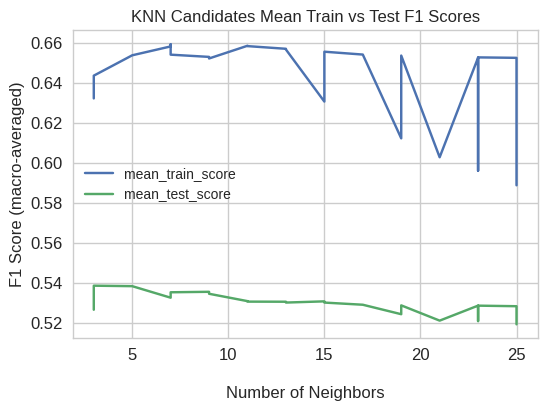

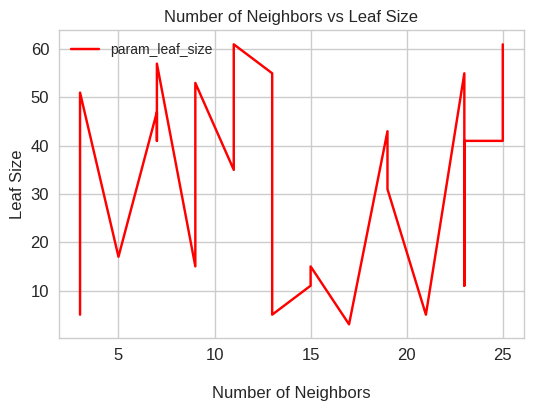

In [ ]:
# Sort the hyperparameter tuning results by n_neighbors hyperparameter on 
# the validation data in ascending order.
knn_search_df = knn_search_df.sort_values(by=['param_n_neighbors'])

# Show the average F1 score of the KNN candidates as we change the 
# 'n_neighbors' and 'leaf_size' hyperparameter values (descending).
plt.style.use('seaborn-whitegrid')
knn_search_df.plot('param_n_neighbors', 
                   ['mean_train_score', 'mean_test_score'], \
                   kind='line',\
                   figsize=(6,4), fontsize=12)
plt.xlabel('\nNumber of Neighbors', fontsize=12)
plt.ylabel('F1 Score (macro-averaged)', fontsize=12)
plt.title('KNN Candidates Mean Train vs Test F1 Scores')

# Leaf size hyperparameter scores plot
knn_search_df.plot('param_n_neighbors', 'param_leaf_size',\
                   kind='line',\
                   figsize=(6,4), fontsize=12, colormap='autumn')
plt.title('Number of Neighbors vs Leaf Size')
plt.xlabel('\nNumber of Neighbors', fontsize=12)
plt.ylabel('Leaf Size', fontsize=12)
plt.show()

##### Plotting the KNN Classification Report

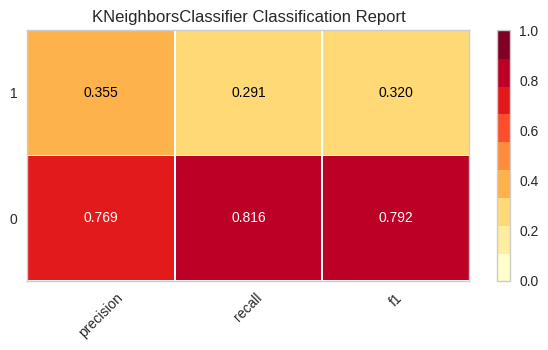

In [ ]:
# Import the yellowbrick classes adopted for model results visualisation
from yellowbrick.classifier import ClassificationReport, PrecisionRecallCurve

# Instantiate the classification report visualiser for the KNN model
knn_cr_viz = ClassificationReport(best_knn, size=(600, 360))

# Fit the visualiser to record the training results
knn_cr_viz.fit(X_train_scaled, y_train)

# Acquire the score for the test set
knn_cr_viz.score(X_test_scaled, y_test)

# Render and display the results
knn_cr_viz.finalize()

##### Storing `KNN` Result and Showing its Confusion Matrix

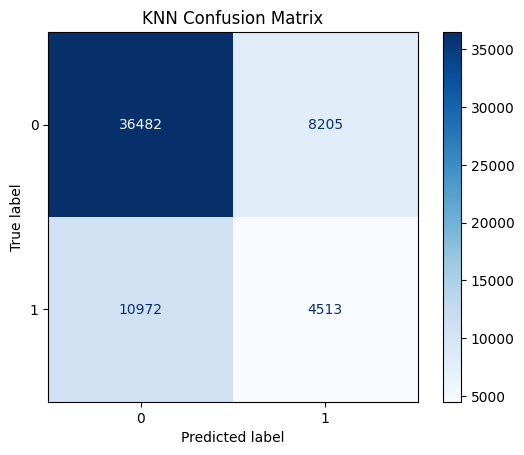

In [ ]:
# Predict the probabilities for each class considering the test dataset
y_proba_knn = best_knn.predict_proba(X_test_scaled)[:,1]
rep = classification_report(y_test, y_pred_knn_best, output_dict=True)

# Add each obtained score to its corresponding dictionary
acc[all_models[0]] = rep['accuracy']
prec[all_models[0]] = rep['macro avg']['precision']
recall[all_models[0]] = rep['macro avg']['recall']
f1_scr[all_models[0]] = rep['macro avg']['f1-score']
auroc[all_models[0]] = roc_auc_score(y_test, y_proba_knn, average='macro')
knn_data = [f'{x.get(all_models[0]):.2%}' for x in [acc, prec, recall, f1_scr, auroc]]

# Plot the KNN confusion matrix 
plot_conf_matrix(best_knn, 'KNN')

Here, we discuss the above illustrations and the results they visualise.

First, we look at the four possible outcomes from a binary classifier depicted on the confusion matrix. We consider the 0 (discharging) label as the positive:

- True Positives (**TP**) &ndash; the top-left square where the number shown depicts the amount of cases when the predicted value matches the actual (predicted vs actual 0's). Here, the number is 36482 which means that the amount of TP is the highest among all.


- True Negatives (**TN**) &ndash; the bottom-right square. We have 4513 TN cases when the predicted value matched the actual value but it was negative (1's).


- False Positives (**FP**) &ndash; the bottom-left square. There are 10972 Type 1 errors present in our predictions. That is, we have falsely predicted that many 0's (positive values).


- False Negatives (**FN**) &ndash; the top-right square which shows 8205 such cases. This means that 1's (negatives) were predicted falsely that many times by the `KNN`.

These values support calculating more advanced classification metrics such as precision, recall, specificity and sensitivity of our classifier (using the their corresponding formula which we do not explore here).

##### Displaying the KNN ROC Curve

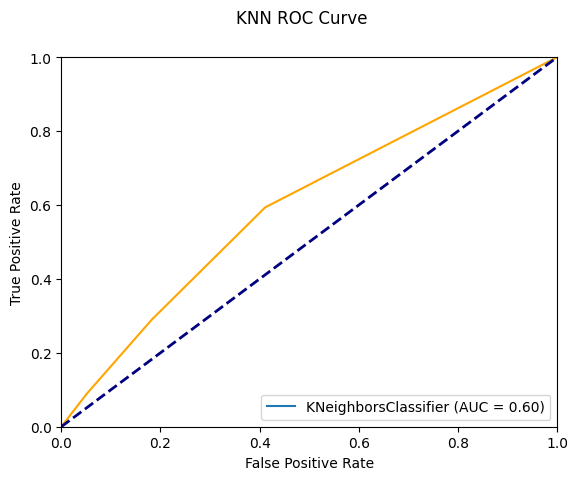

In [ ]:
# Plot the KNN ROC curve
plot_model_roc(best_knn, 'KNN')

**Area Under the Curve** (**AUC**) is a summary of the ROC curve and provides a measure of how well a classifier can distinguish between classes. Generally, the higher the AUROC, the better the model at performing a calssification. An AUROC output of $50\%$ suggests that the model has no discriminatory ability between the classes, i.e., predictions are purely random.

The resultant macro-averaged AUC of our best `KNN` model could be considered as fair $\approx 59.73\%$ taking into account the real-world imbalanced dataset at hand.


##### Analysing KNN Metrics Results

In [ ]:
# Create a Pandas data frame with the various metric results
# of our best KNN model
df_knn = pd.DataFrame(columns=['Accuracy', 'Precision', \
                               'Recall', 'F1 Score', 'AUROC'])
df_knn.loc[all_models[0]] = knn_data
df_knn

,Accuracy,Precision,Recall,F1 Score,AUROC
K-Nearest Neighbors,68.13%,56.18%,55.39%,55.60%,59.73%



- **Precision** (positive predicted value) tells us how many of the correctly predicted cases are actually positive.

- **Recall** shows how many of the actual positive cases we were able to predict correctly with our model. 

- The **F1-score** ($\approx 55.60\%$) represents the harmonic mean of Precision and Recall and is maximised when both are equal. Since both Precision and Recall are close in percentages it follows that the F1 score will be high. We can tell that our algorithm is keeps the recall ($55.39\%$) and precision ($56.18\%$) balanced. Given that we use macro-averaged F1 as our scoring metric and considering the evaluation on a real-world imbalanced dataset the best `KNN` macro-averaged F1 score is acceptable.

- **Accuracy** can be expressed as the proportion of true results in the total number of cases. This means that the the correctly predicted classes is relatively good since our `KNN` model has achieved an accuracy of $\approx 68.13\%$. 


##### Illustrating the Precision-Recall Curve of the KNN

Lastly, we show the Precision-Recall curve for our best `KNN` model.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


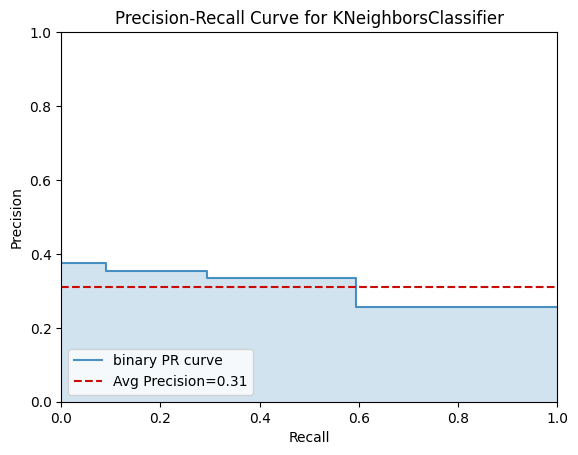

In [ ]:
# Create the KNN Precision-Recall visualizer, fit, score, and show it
knn_prc_viz = PrecisionRecallCurve(best_knn, width=100)
knn_prc_viz.fit(X_train_scaled, y_train)
knn_prc_viz.score(X_test_scaled, y_test)
knn_prc_viz.finalize()

### Implementing the `RandomForestClassifier` Classifier

We import the classifier class from `sklearn` and then proceed to hyperparameter tuning using `RandomizedSearchCV` (reasoning detailed later). The hyperparameters we consider are:

- `max_samples` &ndash; a small sample size would produce more distinct trees, whereas a larger sample size &mdash; more similar. The default value is `None` meaning that the sample size will be set to the size of the training data.


- `n_estimators` &ndash; shows the number of trees we want to have in our forest


- `max_depth` &ndash; specifies the maximum depth of the tree


- `min_samples_split` &ndash; the minimum number of samples for internal node splitting


- `max_samples_leaf` &ndash; defines the minimum number of samples required to reach a leaf node (a smaller value increases the likelihood of the model collecting noise in train data)


- `bootstrap` &ndash; shows whether bootstrap samples are used when building trees. If set to `False`, the whole dataset is used to build each tree.


- `max_features` &ndash; this is the number of features to consider when looking for the best split.

**Note**: We try small numbers for `n_estimators` and `max_depth` parameters because otherwise the hyperparameter search procedure seems to run for indefinite amount of time.


Again, we will first evaluate the default `RandomForestClassifier` ensemble model performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier instance
rfc_def = RandomForestClassifier(random_state=1337)

# Train the default model
rfc_def.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rfc_def = rfc_def.predict(X_test_scaled)

# Show the model accuracy or how often is the classifier correct about its predictions
print('F1 score of the RandomForestClassifier model with the best' +\
      ' configuration on the holdout test set:' +\
      f" {f1_score(y_test, y_pred_rfc_def, average='macro'):.2%}")

F1 score of the RandomForestClassifier model with the best configuration on the holdout test set: 54.19%


We get an macro-averaged F1 score of $\approx 54.19\%$ for our default `RandomForestClassifier` model which is indeed a fair outcome considering the nature of the problem domain.


#### Optimising the `RFC` Hyperparameters

Now, we attempt to improve this score through hyperparameter optimisation. We proceed as follows:

1. Create a parameter search space for our `RandomizedSearchCV` which we adopt for hyperparameter tuning of our `RandomForestClassifier` (`RFC`) model. To pick the most important hyperparameters for the `RFC` model we look at the Scikit-Learn's documentation. These are the number of trees in the forest (`n_estimators`) and the number of features considered for splitting at each leaf node (`max_features`). In our instance, we are dealing with only one feature (`VehicleSpeed_km_h`), thus, we do not include the `max_feature` hyperparameter for tuning because that would be pointless. We also include additional values to optimise, so, the list of hyperparameters we tune is the following:

    - `n_estimators` &ndash; which shows the number of trees in the forest (the greater the number, the more robust the prediction)

    - `max_depth` &ndash; the value depicting the maximum levels of each the decision tree. The deeper the tree, the more splits it has and it captures more information about the data, but the model may overfit.

    - `min_samples_split` &ndash; the number of data points a node can have before it is split. As we increase the value the forest becomes more constrained as it has to consider more samples at each node and might cause underfitting.

    - `min_samples_leaf` &ndash; minimum number of data points allowed in a leaf node (might cause underfitting when too high). 


2. Instantiate the `RFC` model.

3. Create a `RandomizedSearchCV`class instance for the hyperparameter tuning.

4. Run the randomized search using 25 combinations from the parameter grid we built earlier (save runtime because we do not seek the perfect model but we are rather demonstrating our understanding about the problem domain and our problem solving skills, right?).

In [ ]:
# Create the random search parameter grid
rfc_param_grid = {
    'n_estimators': np.arange(75, 130, 5),\
    'max_depth': [250, 500, 1000, None],\
    'min_samples_split': [2, 5, 10],\
    'min_samples_leaf': [2, 5, 10],\
}

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=1337)

# Create the RandomizedSearchCV instance for hyperparameter tuning
rfc_search = RandomizedSearchCV(rfc, rfc_param_grid,\
                                scoring='f1_macro', cv=5,\
                                n_iter=25, verbose=1,\
                                random_state=1337,\
                                return_train_score=True,
                                n_jobs=-1)

# Run the random hyperparameter search using 5 fold cross validation
# with 25 different hyperparameter combinations.
rfc_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 20.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               




On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are $11 \times 4 \times 3 \times 3 = 396$ possible hyperparameter settings to choose from. In our case, we choose 25 candidate model settings out of these 396 (if we pick more candidates the algorithm takes 20+ minutes to run). Then, we evaluate each of them in the 5-fold cross-validation loop to decide upon the best candidate model using the macro-average F1 score as our scoring metric.

#### Rebuilding and Finalising the `RandomForestClassifier` Model with the Best Parameters

Our next steps in evaluating the our ensemble models are:

1. Get the best model hyperparameter settings.


2. Reconstruct the `RandomForestClassifier` model with the best configurations


3. Fit the model on the whole training set to finalise our model.


4. Make predictions on the completely unseen holdout test set to evaluate our finalised classifier.


5. Finally, we compare the default model to our best `RandomForestClassifier` model to see if the hyperparameter tuning procedure has produced a superior model. 

In [ ]:
# Fetch the best parameter configurations
best_rfc_params = rfc_search.best_params_

print('Best KNN configuration:\n')
for k, v in best_rfc_params.items():
    print(f'\t{k} = {v}\n')

# Fetch the best hyperparameter values to for later use
best_n_estimators, best_min_samples_split, best_min_samples_leaf, \
    best_max_depth = best_rfc_params.values()

# Rebuild the model with the best parameter settings
best_rfc = RandomForestClassifier(n_estimators=best_n_estimators,\
                                  max_depth=best_max_depth,\
                                  min_samples_split=best_min_samples_split,\
                                  min_samples_leaf=best_min_samples_leaf,\
                                  random_state=1337)

# Fit on the whole scaled training dataset
best_rfc.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rfc_best = best_rfc.predict(X_test_scaled)

# Model accuracy or how often is the classifier correct about its predictions
print('F1 score of the RandomForestClassifier model with the best' +\
      ' configuration on the holdout test set:' +\
      f" {f1_score(y_test, y_pred_rfc_best, average='macro'):.2%}")

Best KNN configuration:

	n_estimators = 90

	min_samples_split = 5

	min_samples_leaf = 2

	max_depth = 1000

F1 score of the RandomForestClassifier model with the best configuration on the holdout test set: 54.17%


Via hyperparameter tuning, we achieve a macro-averaged F1 score of $\approx 54.17\%$. This indicates that we were unsuccessful in identifying a better hyperparameter configuration than the default `RFC` one. Thus, for the time being, we take the default model as our best model and proceed with the next tasks.

*Due to time constraints we leave further hyperparameter optimisation trials as future work.*

In [ ]:
# Make the default RFC model our best model
best_rfc = rfc_def

#### Visualising and Storing the Best `RandomForestClassifier` Model Performances


##### Showing the Macro-Averaged F1 Train vs Test Mean Scores

These scores consider all candidates evaluated during the hyperparameter search.

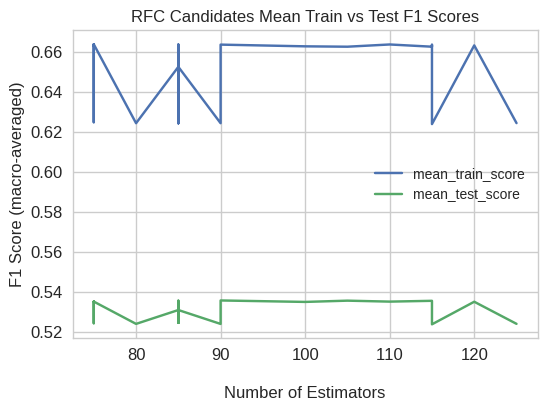

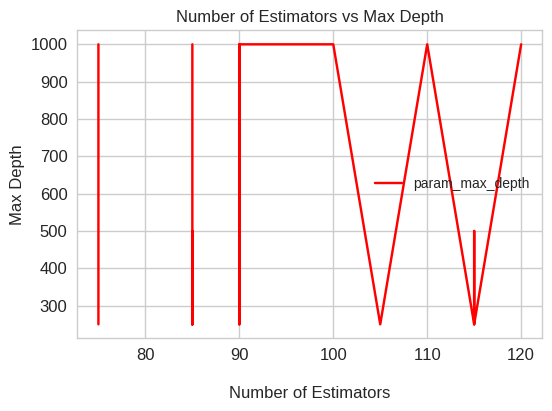

In [ ]:
# Sort the hyperparameter tuning results by n_neighbors hyperparameter on the validation data
# in ascending order.
rfc_search_df = pd.DataFrame(rfc_search.cv_results_).\
    sort_values(by=['param_n_estimators'])

# Show the average F1 score of the KNN candidates as we change the 
# 'n_neighbors' and 'max_depth' hyperparameter values (descending).
plt.style.use('seaborn-whitegrid')
rfc_search_df.plot('param_n_estimators', \
                   ['mean_train_score', 'mean_test_score'], kind='line', \
                   figsize=(6, 4), fontsize=12)
plt.title('RFC Candidates Mean Train vs Test F1 Scores')
plt.xlabel('\nNumber of Estimators', fontsize=12)
plt.ylabel('F1 Score (macro-averaged)', fontsize=12)

# Max depth hyperparameter plot
rfc_search_df.plot('param_n_estimators', \
                   ['param_max_depth'], kind='line', \
                   figsize=(6, 4), fontsize=12, colormap='autumn')
plt.title('Number of Estimators vs Max Depth')
plt.xlabel('\nNumber of Estimators', fontsize=12)
plt.ylabel('Max Depth', fontsize=12)
plt.show()

##### Illustrating the `RFC` Model Classification Report

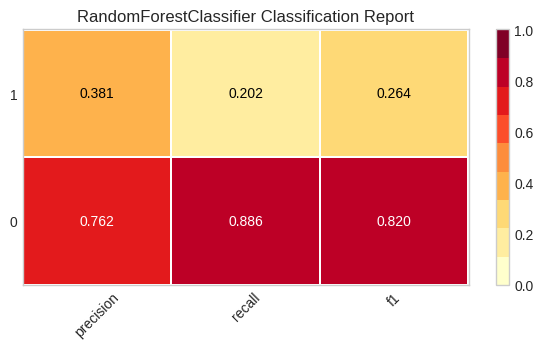

In [ ]:
# Instantiate the classification report visualiser for the `RFC` model
rfc_viz = ClassificationReport(best_rfc, size=(600, 360))

# Fit the visualiser to record the training results
rfc_viz.fit(X_train_scaled, y_train)

# Acquire the score for the test set
rfc_viz.score(X_test_scaled, y_test)

# Render and display the results
rfc_viz.finalize()

##### Storing the `RFC` Metric Score Results

In [ ]:
# Predict the probabilities for each class considering the test dataset
y_proba_rfc = best_rfc.predict_proba(X_test_scaled)[:,1]
rfc_rep = classification_report(y_test, y_pred_rfc_def, output_dict=True)

# Add each obtained score to its corresponding dictionary
acc[all_models[1]] = rfc_rep['accuracy']
prec[all_models[1]] = rfc_rep['macro avg']['precision']
recall[all_models[1]] = rfc_rep['macro avg']['recall']
f1_scr[all_models[1]] = rfc_rep['macro avg']['f1-score']
auroc[all_models[1]] = roc_auc_score(y_test, y_proba_rfc, average='macro')
rfc_data = [f'{x.get(all_models[1]):.2%}' for x in 
            [acc, prec, recall, f1_scr, auroc]]


##### Displaying the RFC Confusion Matrix

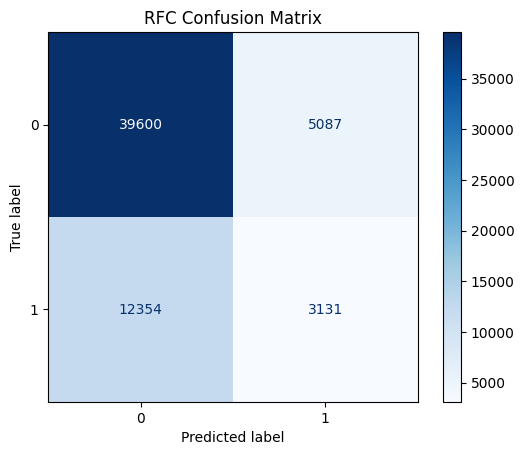

In [ ]:
# Plot the KNN confusion matrix and ROC curve
plot_conf_matrix(best_rfc, 'RFC')

Now, we describe the confusion matrix shown above:

- True Positives (**TP**) = 39600 or $\approx 65.81\%$ of all predictions.


- True Negatives (**TN**) = 3131 or $\approx 5.20\%$ of all predictions.


- False Positives (**FP**) = 12354 or $\approx 20.53\%$ of all predictions.


- False Negatives (**FN**) = 5087 or $\approx 8.45\%$ of all predictions.


##### Visaulising the `RFC` ROC Curve

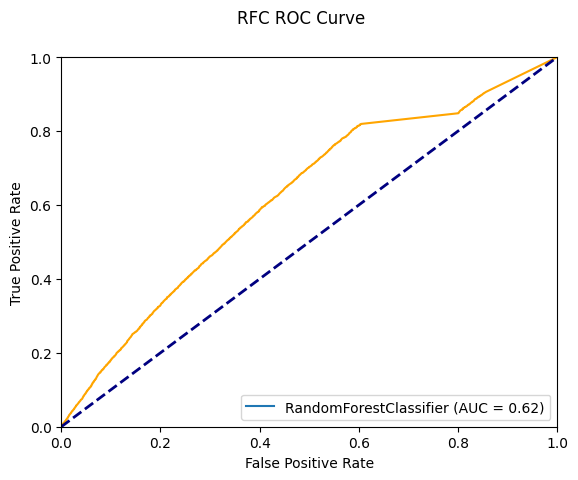

In [ ]:
# Plot RFC ROC curve
plot_model_roc(best_rfc, 'RFC')


The micro-averaged AUC for our best (default) `RandomForestClassifier` model is $\approx 62.03\%$ or again worthwile result.


In [ ]:
# Create a Pandas data frame where we store the `RFC` metrics results
df_rfc = pd.DataFrame(columns=['Accuracy', 'Precision', \
                               'Recall', 'F1 Score', 'AUROC'])
df_rfc.loc[all_models[1]] = rfc_data
df_rfc

,Accuracy,Precision,Recall,F1 Score,AUROC
Random Forest,71.01%,57.16%,54.42%,54.19%,62.03%



- The `RandomForestClassifier` achieves an macro-averaged F1-score of $\approx 54.19\%$. We can tell that the model has balanced the recall ($54.42\%$) and precision rates ($57.16\%$).

- The correctly predicted labels percentage or the accuracy of the `RFC` model is acceptable, standing at $\approx 71.01\%$.

##### Show the `RFC` Model Precision-Recall Curve

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


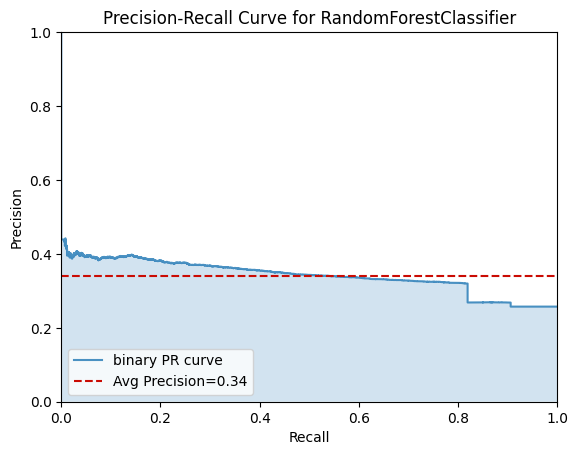

In [ ]:
# Create the Precision-Recall visualizer, fit, score, and show it
rfc_prc_viz = PrecisionRecallCurve(best_rfc)
rfc_prc_viz.fit(X_train_scaled, y_train)
rfc_prc_viz.score(X_test_scaled, y_test)
rfc_prc_viz.finalize()

### Showing a KNN vs RFC Metric Scores Comparison
Finally, we compare the metric results of both the best `KNN` and `RandomForestClassifier` models.

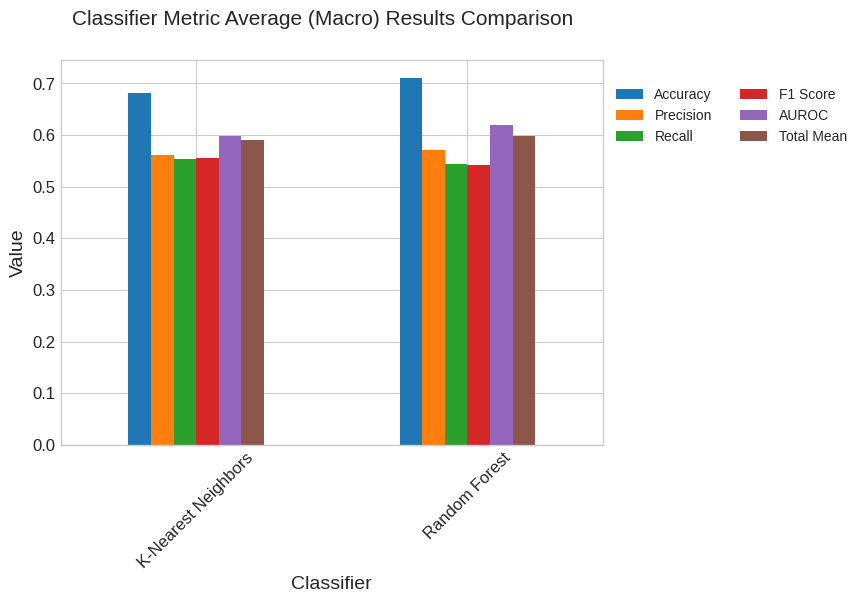

,Accuracy,Precision,Recall,F1 Score,AUROC,Total Mean
K-Nearest Neighbors,0.681297,0.561819,0.553916,0.555955,0.597294,0.590056
Random Forest,0.710148,0.571603,0.544180,0.541857,0.620287,0.597684


In [ ]:
# Add the metrics data to the models data frame
df_model['Accuracy'] = acc.values()
df_model['Precision'] = prec.values()
df_model['Recall'] = recall.values()
df_model['F1 Score'] = f1_scr.values()
df_model['AUROC'] = auroc.values()
df_model['Total Mean'] = df_model.mean(axis=1)

# Plot the metric results to visualise the comparison of KNN and RFC
plt.style.use('seaborn-whitegrid')
df_model.plot.bar(rot=45, figsize=(7,5), fontsize=12)
plt.legend(ncol= len(all_models), bbox_to_anchor=(1, .75), loc='lower left', prop={'size': 10})
plt.ylabel('Value', fontsize=14)
plt.xlabel('Classifier', fontsize=14)
plt.suptitle('Classifier Metric Average (Macro) Results Comparison', fontsize=15)
plt.show()
df_model

The comparison figure displays that the performance of both classifiers is almost identical. However,
on closer look it becomes apparent that the `RandomForestClassifier` outperforms the `KNN` by a tiny yet insignificant margin. 

## Subtask 3.a.

**Note**: We have already broadly detailed the acquired results in the previous sections. Therefore, in this part, we provide some additional information about the reason we obtained such results for the models seen previously and mention some future work ideas. 

In the earlier sections, we made it clear that are being evaluated on a dataset that is not only a complex real-world example but one where classes are not equally represented, too. Small differences in class labels are often expected whereas larger ones will mostly lead to false results when using the incorrect metric. Hence, we avoided using accuracy as our performance metric and replaced it with the macro-averaged F1 score which was definitely a better and non-misleading choice. Apart from this tactic of trying a different metric, we mention several others as areas of model performance and dataset improvement to look into in the future:

- Collecting more data &ndash; getting more examples of the minor label data might balance the classes of the dataset.


- Resampling the dataset &ndash; either by over-sampling (adding copies) or down-sampling (deleting records of the overrepresented label, but rather naive method).


- Generating synthetic samples &ndash; we can produce new minority class instances through over-sampling techniques.


- Changing models &ndash; we could try experimenting with different algorithms suchs as `BN` or `SVM`.


- Attempting model penalisation &ndash; there are modified versions of some algorithms such as `penalized-SVM` which introduce additional cost for wrongly predicting the underrepresented class.


- Trying anomaly or change detection &ndash; we can shift our thinking to gain a better insight on the problem at hand.

- Improvising (divide and conquer) &ndash; break the problem into smaller parts and try solving it this way.


- Magnifying the hyperparameter optimisation &ndash; we can try evaluating more hyperparameter values for our models. 

Overall, the demonstrated model results are not a reliable estimate of the capability of our classifiers. That is, getting a more diverse set of target variables for training and testing we believe would positively impact their performances. If not, we would have proven that such datasets are too complex for this kind of simple classifiers.

## Subtask 3.b.

A random forest classifier uses an ensemble methodology to reach a prediction output. 

- Firstly, a variety of decision trees are trained with the training data. 

- As part of the splitting of nodes, observations and features will be selected randomly.

Decision trees play a crucial role in random forest algorithms. Each decision tree consists of a single root node and the remaining are leaf and decision nodes. The leaf nodes of decision trees represent the final output produced by each particular decision tree. These final outputs are determined by majority vote of the decision trees. This is illustrated in the diagram below.

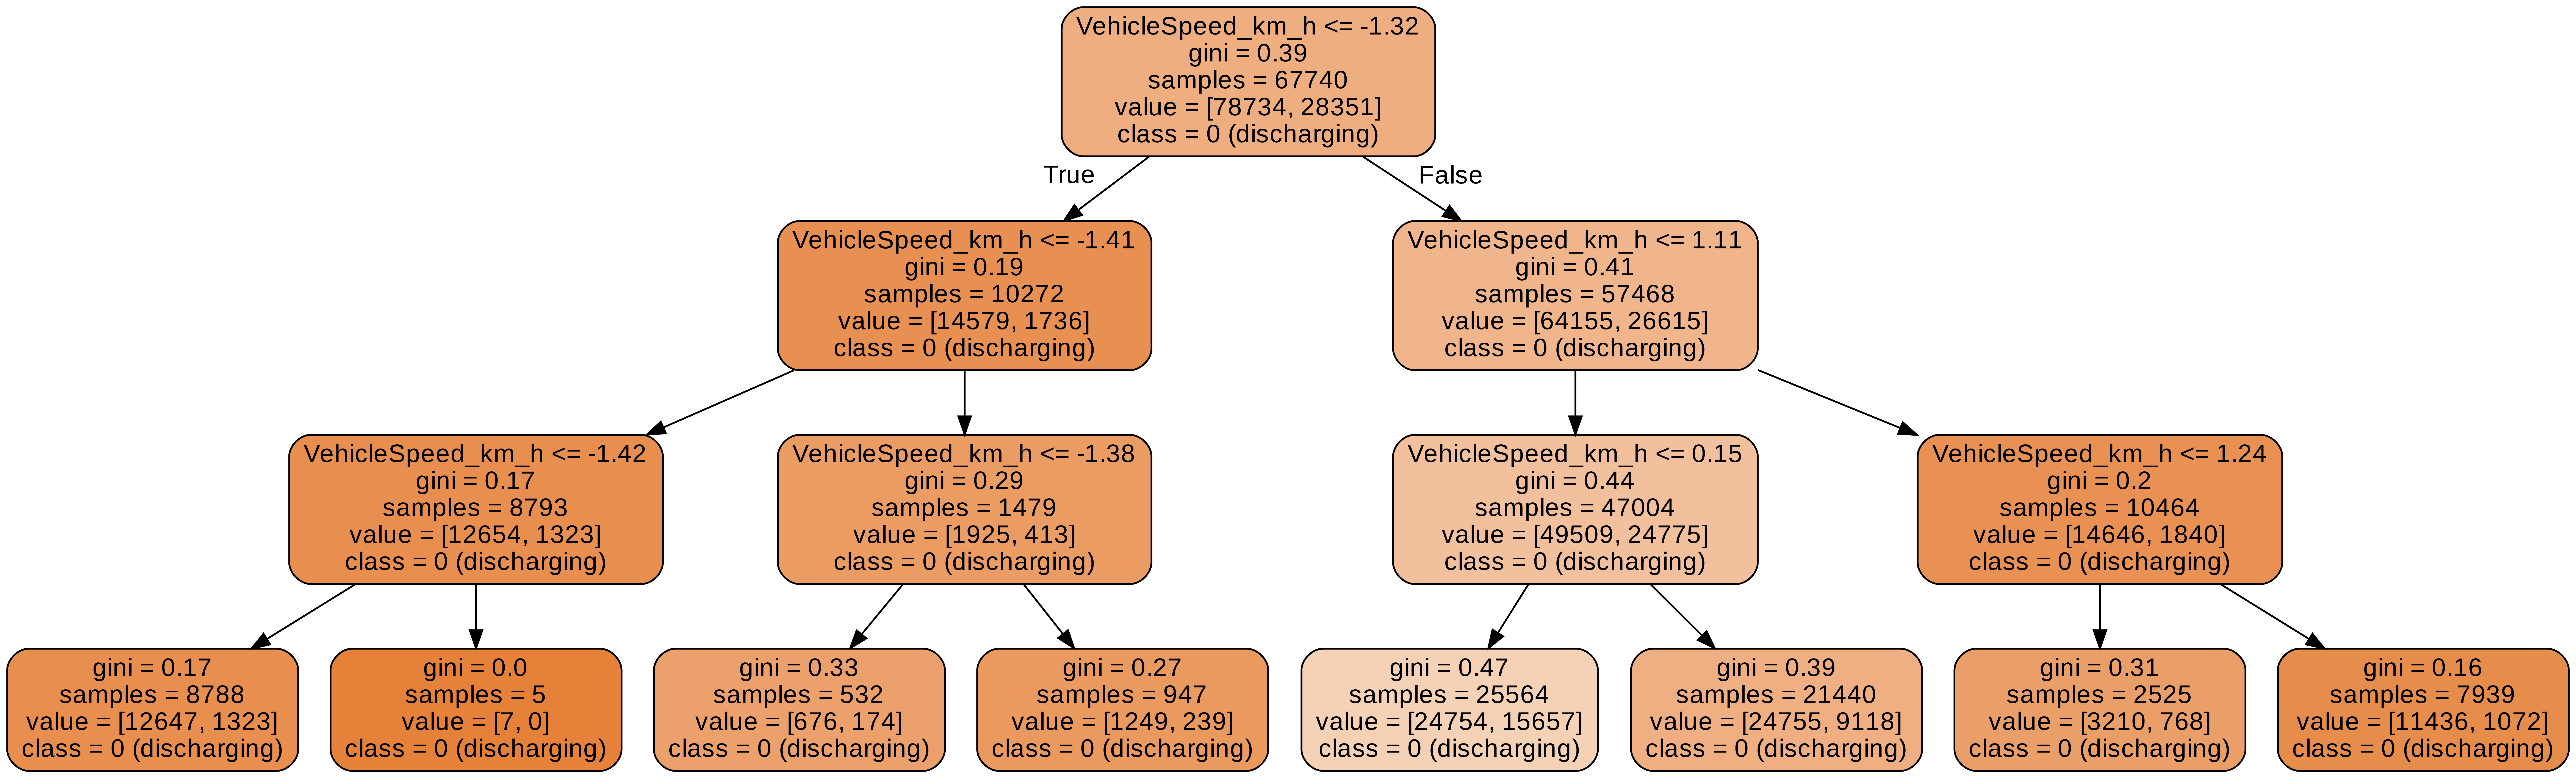

In [ ]:
# Create a random forest classifier instance with max_depth=3
# for illustration purposes
graph_tree = RandomForestClassifier(max_depth=3, random_state=1337)

# Train the illustration model
graph_tree.fit(X_train_scaled, y_train)

from sklearn.tree import export_graphviz

# Export a single decision tree from the `RFC` as a DOT file
export_graphviz(graph_tree.estimators_[0], out_file='tree.dot',
                feature_names=['VehicleSpeed_km_h'],
                class_names=['0 (discharging)','1 (charging)'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to a PNG using a system call
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the PNG
from IPython.display import Image
Image(filename = 'tree.png', width=1000)



For instance, in our case, we have a single feature in our dataset. Hence, when splitting a node only the observations (`VehicleSpeed_km_h_`) will be selected randomly. Moreover, our feature data points consists of various vehicle speeds. The `RFC` divides these `VehicleSpeed_km_h_` data values into `n_estimators` number of subsets. The random forest assigns these subsets to every decision tree and then each produce their own individual output. In our case, the decision for trees could be either 0 (discharging) or 1 (charging).

Given that each decision tree has made its prediction, the `RFC` gathers all class predicitions to determine the final output. If the number of 0 predictions is greater than those of 1's then 0 will be the final taken as the final prediction output of the random forest.